#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

THE SUMMARY :
1-while searching for null values both status and notes columns appear to be fully null values so the best way was dropping them

2-the rest columns that had null values,the mean was used to replace null values

3-finishing the date cleaning process by dropping any duplicates and useing the "dropna" function to drop any null values that seemed to appear  due to any changes

4-after reviewing the salary distrbution among departments and job titles it shows that fire department is the highest paid  , and the highest paid job is the chef of fire department

5- the head department seem to have the highest salaries  of any other department

6-it also shows that the assistant chief of fire department has highest overtime pay rate

7-there is also a direct relation between basepay and totalpay showing that the intial paid value keeps increasing over time

8-it shows that the police department is the one with highest employees number  while medical department is the least

9-when grouping the salary by years iit shows that 2014 was the year with the highest paid salaries while 2011 is the least

10-year 2011 had the highest paid salary

11-high correlation coofecient betwee total pay and total pay benifits shows the direct relation between them


# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
pip install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
# Load your dataset
df = pd.read_csv('/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN


In [61]:
df.columns
df.shape
df.dtypes
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [63]:
df.drop_duplicates(inplace=True)

In [ ]:
df["TotalPay"].describe() #shows mean,std,min and max

count    134437.000000
mean      80144.593317
std       49789.794985
min           0.000000
25%       49568.500000
50%       76431.670000
75%      110872.280000
max      567595.430000
Name: TotalPay, dtype: float64

In [ ]:
df["TotalPay"].mode()

0    0.0
Name: TotalPay, dtype: float64

In [ ]:
df["TotalPay"].median()

76431.67

In [66]:
salary_range=df["TotalPay"].max()-df["TotalPay"].min()

In [ ]:
#when null values where displayed  Status and Notes appear to be empty columns so it was better dropping them
df["Status"].unique()
df.drop("Status",axis=1,inplace=True)
df["Notes"].unique()
df.drop("Notes",axis=1,inplace=True)

In [ ]:
df["Benefits"].unique()
benifits_mean=df["Benefits"].mean() # to get average values
df["Benefits"].fillna(benifits_mean,inplace=True)

In [ ]:
df["BasePay"].unique()
BasePay_mean=df["BasePay"].mean() # to get average values
df["BasePay"].fillna(BasePay_mean,inplace=True)

In [ ]:
df["OvertimePay"].unique()
df["OvertimePay"].fillna(0.0,inplace=True)

In [ ]:
df["OtherPay"].unique()
Other_mean=df["OtherPay"].mean() # to get average values
df["OtherPay"].fillna(Other_mean,inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
departments_df=df[df["JobTitle"].str.contains("DEPARTMENT")]

In [ ]:
departments_df["JobTitle"].unique() #collecting most common department names

In [ ]:
index = ["POLICE DEPARTMENT", "FIRE DEPARTMENT", "MEDICAL STAFF SERVICES DEPARTMENT", "HEAD DEPARTMENT"]
def find(job_title):
    x= process.extractOne(job_title, index)
    return 'else' if x[1] < 80 else x[0]
departments_df['main_departments'] = departments_df['JobTitle'].apply(find)

y= departments_df['main_departments'].value_counts()                               #using this function to help deal with independant departments

<ipython-input-19-81708a08f953>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departments_df['main_departments'] = departments_df['JobTitle'].apply(find)


In [ ]:
departments_df['main_departments'].unique()

array(['POLICE DEPARTMENT', 'FIRE DEPARTMENT', 'HEAD DEPARTMENT',
       'MEDICAL STAFF SERVICES DEPARTMENT'], dtype=object)

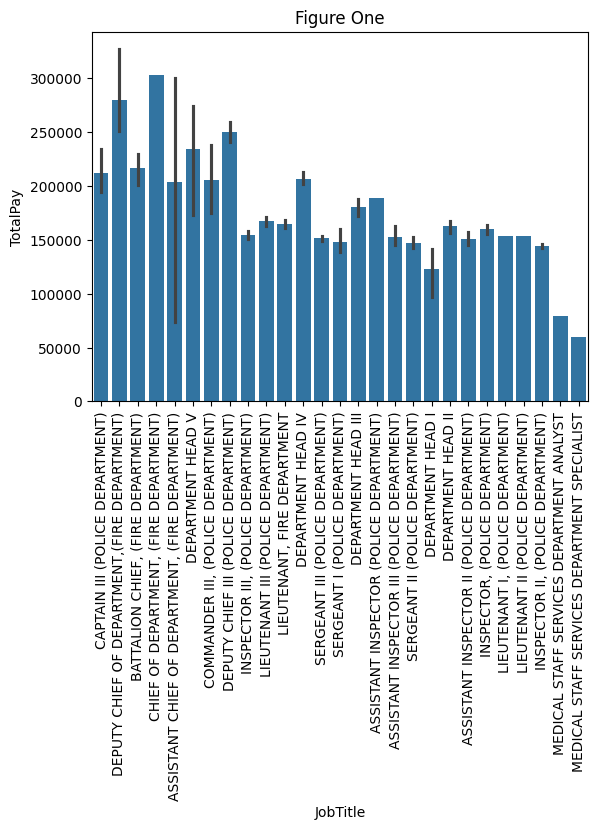

In [ ]:
sns.barplot(departments_df, x="JobTitle",y="TotalPay",legend=False)
plt.xticks(rotation=90)
plt.title("Figure One")
plt.show()

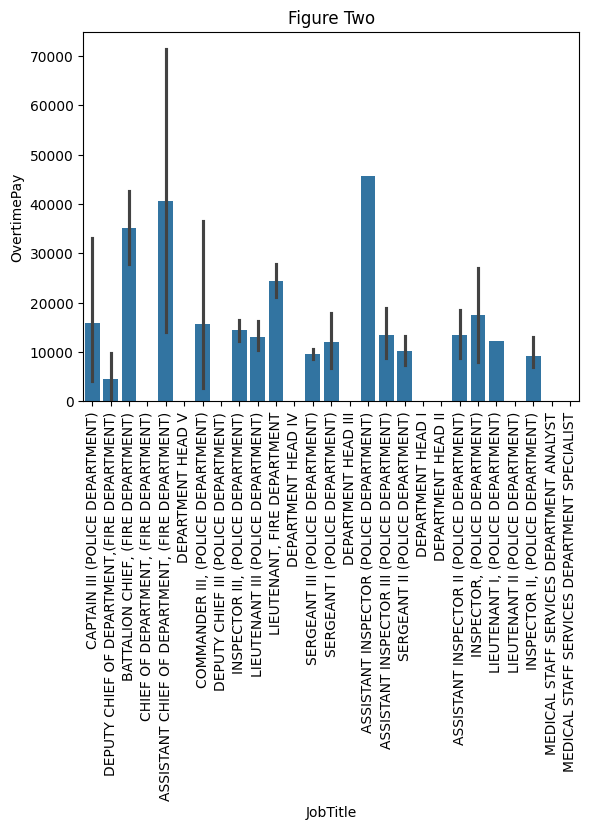

In [ ]:
sns.barplot(departments_df, x="JobTitle",y="OvertimePay",legend=False)
plt.xticks(rotation=90)
plt.title("Figure Two")
plt.show()

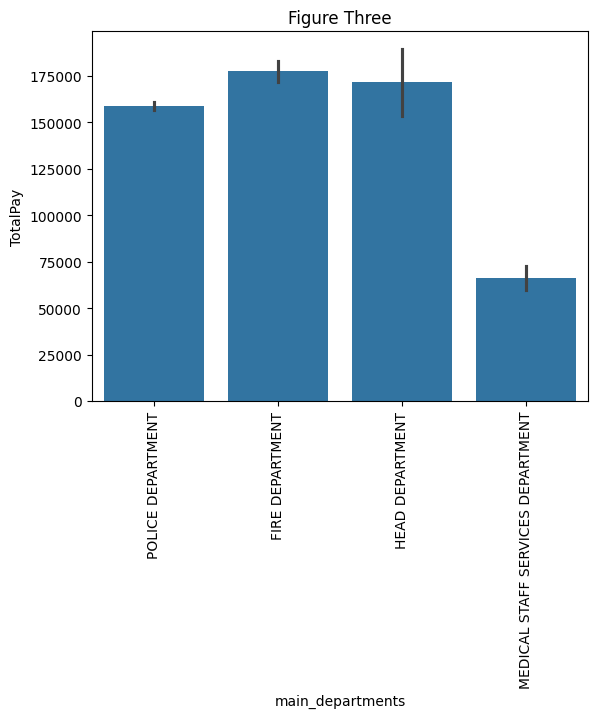

In [ ]:
sns.barplot(departments_df, x=departments_df['main_departments'],y="TotalPay")
plt.xticks(rotation=90)
plt.title("Figure Three")
plt.show()

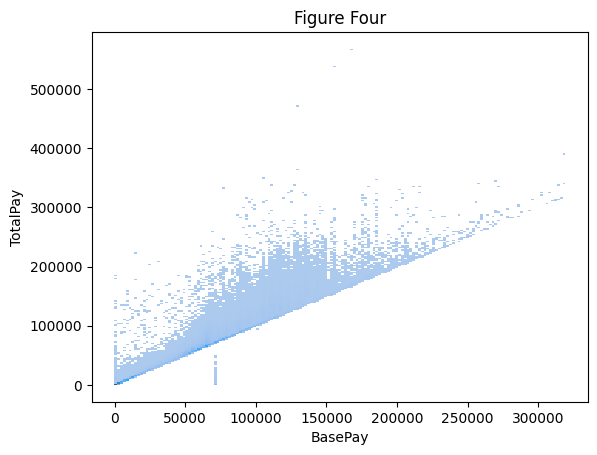

In [ ]:
sns.histplot(df, x="BasePay",y="TotalPay")
plt.title("Figure Four")
plt.show()

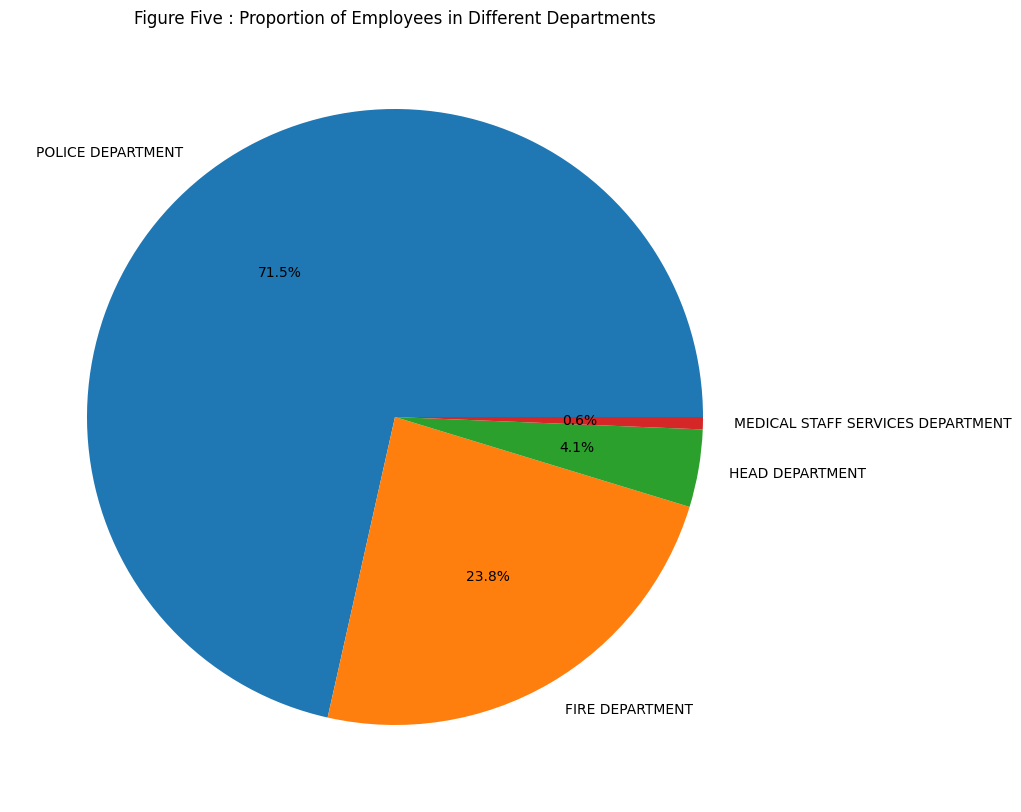

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(y, labels=y.index,autopct='%1.1f%%')
plt.title('Figure Five : Proportion of Employees in Different Departments')
plt.show()

In [ ]:
group1_years=df.groupby("Year")
group1_years["TotalPay"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011.0,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.240,102512.6800,567595.43
2012.0,36766.0,74113.262265,49523.904319,0.00,37560.6075,70714.680,104099.1700,362844.66
2013.0,37606.0,77611.443142,52854.774783,0.00,36754.9950,74500.015,109637.6700,347102.32
2014.0,23906.0,106111.415904,38924.304886,49020.61,75572.6500,96489.150,128986.9625,471952.64


In [ ]:
group1_years["TotalPay"].mean()

Year
2011.0     71744.103871
2012.0     74113.262265
2013.0     77611.443142
2014.0    106111.415904
Name: TotalPay, dtype: float64

In [ ]:
group2_dep=departments_df.groupby(["main_departments","BasePay"])
group2_dep["TotalPay"].describe()

count       mean  std        min        25%  \
main_departments  BasePay                                                  
FIRE DEPARTMENT   0.00         1.0    7093.37  NaN    7093.37    7093.37   
                  21804.00     1.0  124504.66  NaN  124504.66  124504.66   
                  21948.99     1.0   73444.97  NaN   73444.97   73444.97   
                  25400.00     1.0  204594.63  NaN  204594.63  204594.63   
                  59663.78     1.0  121347.43  NaN  121347.43  121347.43   
...                            ...        ...  ...        ...        ...   
POLICE DEPARTMENT 215914.03    1.0  228207.86  NaN  228207.86  228207.86   
                  226206.80    1.0  241211.17  NaN  241211.17  241211.17   
                  233867.60    1.0  248718.64  NaN  248718.64  248718.64   
                  254027.63    1.0  259927.11  NaN  259927.11  259927.11   
                  261717.60    1.0  264074.60  NaN  264074.60  264074.60   

                                   50%        75%        max  
main_departments  BasePay                                     
FIRE DEPARTMENT   0.00         7093.37    7093.37    7093.37  
                  21804.00   124504.66  124504.66  124504.66  
                  21948.99    73444.97   73444.97   73444.97  
                  25400.00   204594.63  204594.63  204594.63  
                  59663.78   121347.43  121347.43  121347.43  
...                                ...        ...        ...  
POLICE DEPARTMENT 215914.03  228207.86  228207.86  228207.86  
                  226206.80  241211.17  241211.17  241211.17  
                  233867.60  248718.64  248718.64  248718.64  
                  254027.63  259927.11  259927.11  259927.11  
                  261717.60  264074.60  264074.60  264074.60  

[519 rows x 8 columns]

In [ ]:
group2_dep["TotalPay"].mean()

main_departments   BasePay  
FIRE DEPARTMENT    0.00           7093.37
                   21804.00     124504.66
                   21948.99      73444.97
                   25400.00     204594.63
                   59663.78     121347.43
                                  ...    
POLICE DEPARTMENT  215914.03    228207.86
                   226206.80    241211.17
                   233867.60    248718.64
                   254027.63    259927.11
                   261717.60    264074.60
Name: TotalPay, Length: 519, dtype: float64

<Axes: xlabel='TotalPay', ylabel='TotalPayBenefits'>

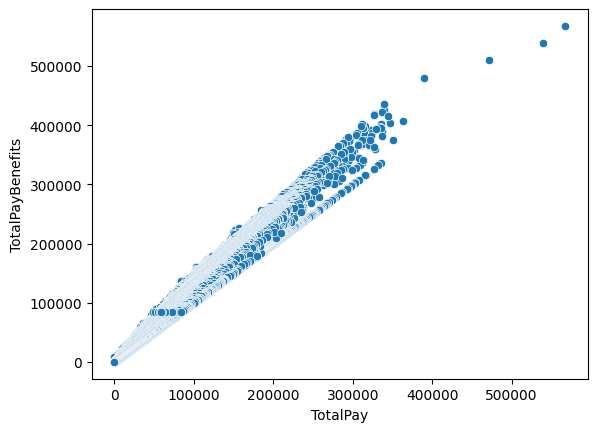

In [64]:
sns.scatterplot(x="TotalPay", y="TotalPayBenefits", data=df)


In [65]:
correlation=df["TotalPay"].corr(df["TotalPayBenefits"])
correlation #pretty high correlation

0.9747074494642592

# Good Luck!